ipywidgets is not installed in 3D Slicer's Python environment. These classes will not be available: ViewSliceWidget, ViewSliceBaseWidget, View3DWidget, FileUploadWidget, AppWindow, ViewInteractiveWidget


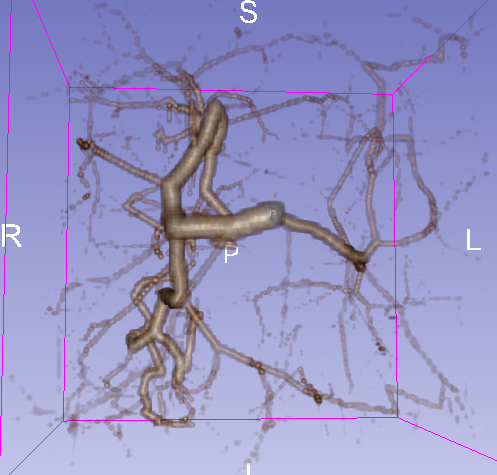

In [1]:
import JupyterNotebooksLib as slicernb
import slicer
import ScreenCapture
import vtk

# Load stack of images
volume = slicer.util.loadVolume("/home/jathushan/Desktop/VascuSynth/normal+tumour/testing/original_image/image000.jpg", {"singleFile": False})

# Enable 3D volume render
slicernb.showVolumeRendering(volume)
layoutManager = slicer.app.layoutManager()
threeDWidget = layoutManager.threeDWidget(0)
threeDView = threeDWidget.threeDView()
threeDView.resetFocalPoint()
camera = slicer.mrmlScene.GetFirstNodeByClass('vtkMRMLCameraNode').GetCamera()
camera.Dolly(2.5)
slicernb.ViewDisplay("OneUp3D")

In [2]:
def showVolumeRenderingMIP(volumeNode):
  """
  Render volume using maximum intensity projection using same color from slice views
  """
  # Get/create  volume property node & volume rendering display node
  volRenLogic = slicer.modules.volumerendering.logic()
  volPropNode = slicer.mrmlScene.GetFirstNodeByClass("vtkMRMLVolumePropertyNode")
  displayNode = volRenLogic.GetFirstVolumeRenderingDisplayNode(volumeNode)

  # Choose MIP volume rendering preset
  volRenLogic.CopyDisplayToVolumeRenderingDisplayNode(displayNode)

  # Transfer Function to map an opacity value to each point
  opacityTF = vtk.vtkPiecewiseFunction()
  for i in range(1,5):
        opacityTF.AddPoint(i, 1.0)
  # Set Scalar Opacity Mapping
  volPropNode.SetScalarOpacity(opacityTF)

  # Switch views to MIP mode
  for viewNode in slicer.util.getNodesByClass("vtkMRMLViewNode"):
    viewNode.SetRaycastTechnique(slicer.vtkMRMLViewNode.MaximumIntensityProjection)
  # Show volume rendering
  displayNode.SetVisibility(True)

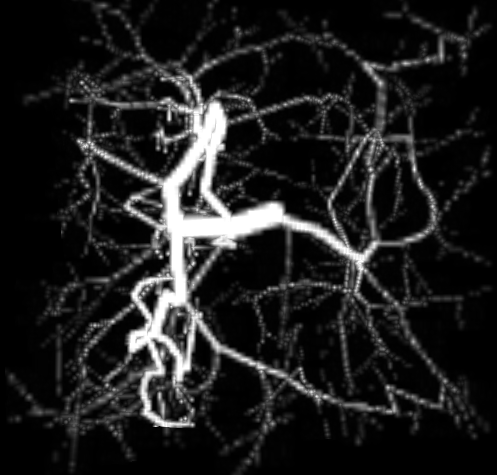

In [3]:
volumeNode = slicer.mrmlScene.GetFirstNodeByClass("vtkMRMLScalarVolumeNode")
showVolumeRenderingMIP(volumeNode)
# Set background to black (required for transparent background)
view = slicer.app.layoutManager().threeDWidget(0).threeDView()
view.mrmlViewNode().SetBackgroundColor(0,0,0)
view.mrmlViewNode().SetBackgroundColor2(0,0,0)
v = slicer.util.getNode("View1")
v.SetBoxVisible(False)
v.SetAxisLabelsVisible(False)

slicernb.ViewDisplay("OneUp3D")

In [4]:
threeDView.setPitchRollYawIncrement(10)
i = 0
while i<36:
    threeDView.pitch()
    cap = ScreenCapture.ScreenCaptureLogic()
    cap.captureImageFromView(threeDView, "normal+tumour/X-axis MIPs/MIP_"+str(i)+".png")
    i += 1

i = 0
while i<36:
    threeDView.roll()
    cap = ScreenCapture.ScreenCaptureLogic()
    cap.captureImageFromView(threeDView, "normal+tumour/Y-axis MIPs/MIP_"+str(i)+".png")
    i += 1
i = 0
while i<36:
    threeDView.yaw()
    cap = ScreenCapture.ScreenCaptureLogic()
    cap.captureImageFromView(threeDView, "normal+tumour/Z-axis MIPs/MIP_"+str(i)+".png")
    i += 1